In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


In [3]:
df = pd.read_csv("Training Data.csv") # to read the data #

In [4]:
def printShapeAndData(panda):  
    print(panda.shape)
    display(panda.head(10))
df= pd.read_csv('Training Data.csv')

printShapeAndData(df)


(252000, 13)


,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
5,6,6915937,64,0,single,rented,no,Civil_servant,Jalgaon,Maharashtra,0,12,0
6,7,3954973,58,14,married,rented,no,Librarian,Tiruppur,Tamil_Nadu,8,12,0
7,8,1706172,33,2,single,rented,no,Economist,Jamnagar,Gujarat,2,14,0
8,9,7566849,24,17,single,rented,yes,Flight_attendant,Kota[6],Rajasthan,11,11,0
9,10,8964846,23,12,single,rented,no,Architect,Karimnagar,Telangana,5,13,0


In [5]:
# As it will be hard to convert all the states and cities we won't be considering that#

df.drop(['Id','CITY','STATE'], axis = 1, inplace = True )


In [6]:
# as the current job years is very similiar to experience we will drop it#

df.drop(['CURRENT_JOB_YRS'], axis = 1 , inplace = True)

In [7]:
# checking for null values #

pd.isnull(df).sum()

Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [8]:
df

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,13,0
1,7574516,40,10,single,rented,no,Software_Developer,13,0
2,3991815,66,4,married,rented,no,Technical_writer,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,12,1
4,5768871,47,11,single,rented,no,Civil_servant,14,1
...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,single,rented,no,Surgeon,11,0
251996,2843572,26,10,single,rented,no,Army_officer,11,0
251997,4522448,46,7,single,rented,no,Design_Engineer,12,0
251998,6507128,45,0,single,rented,no,Graphic_Designer,10,0


In [9]:
df.describe()

,Income,Age,Experience,CURRENT_HOUSE_YRS,Risk_Flag
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,11.997794,0.123000
std,2.878311e+06,17.063855,6.002590,1.399037,0.328438
min,1.031000e+04,21.000000,0.000000,10.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,11.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,12.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,14.000000,1.000000


<AxesSubplot:xlabel='House_Ownership', ylabel='count'>

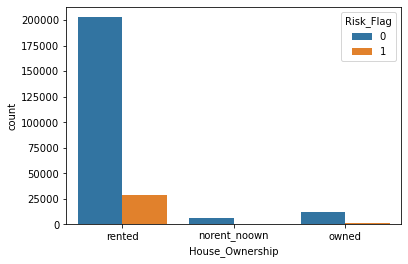

In [10]:
# seaborn.countplot and x,y, and hue variables will be pllotted #

sns.countplot(x = df['House_Ownership'],hue = df['Risk_Flag'])

In [11]:
df.House_Ownership.value_counts()

rented          231898
owned            12918
norent_noown      7184
Name: House_Ownership, dtype: int64

In [12]:
# as the data is so distorted towards rented houses #

<AxesSubplot:xlabel='Car_Ownership', ylabel='count'>

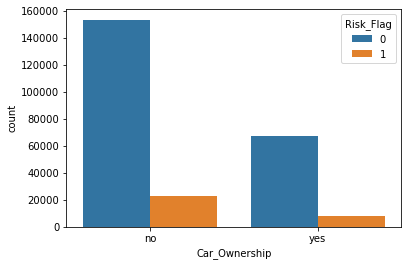

In [13]:
sns.countplot(x = df['Car_Ownership'],hue = df['Risk_Flag'])

In [14]:
df.Car_Ownership.value_counts()

no     176000
yes     76000
Name: Car_Ownership, dtype: int64

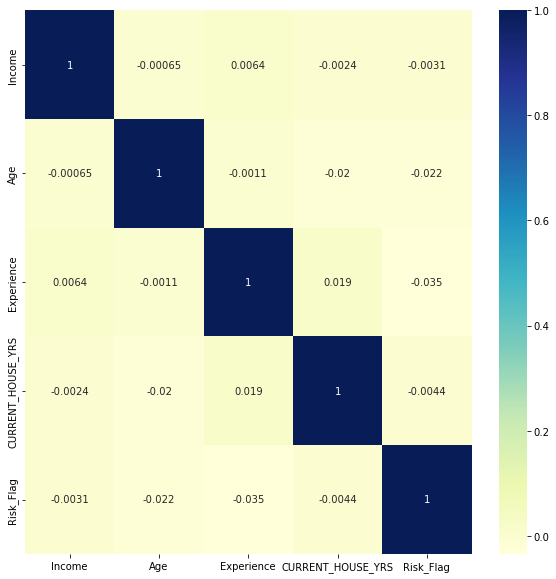

In [15]:
# checking correlation #

plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot=True,cmap = 'YlGnBu');  

# annot=true: write the data value in each cell and cmap:The mapping from data values to color space 

<AxesSubplot:xlabel='Risk_Flag', ylabel='count'>

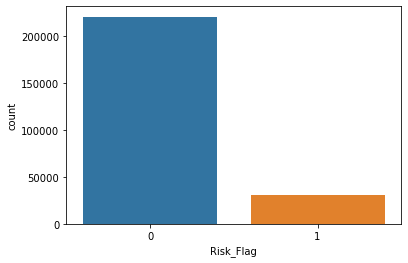

In [16]:
sns.countplot(x = df['Risk_Flag'])

In [17]:
# as we can see that risk flag is very extorted towards 'o' value #

([<matplotlib.patches.Wedge at 0x15a89ba8460>,
 [Text(-0.3467975488570925, -1.0439020356847248, 'single'),
  Text(0.3783246254087823, 1.1388022118916457, 'married')],
 [Text(-0.1891622993765959, -0.5694011103734863, '89.8%'),
  Text(0.22068936482178966, 0.6643012902701266, '10.2%')])

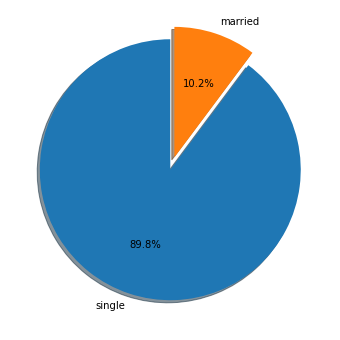

In [19]:
plt.figure(figsize = (6,6))
plt.pie(df['Married/Single'].value_counts(),explode = (0,0.1),startangle = 90,autopct='%1.1f%%',shadow = True
        ,labels = ['single','married']
        )

In [25]:
df['Married/Single'].replace({'married':1,'single':0},inplace = True)
df['Car_Ownership'].replace({'yes':1,'no':0},inplace = True)

In [26]:
df

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,0,rented,0,Mechanical_engineer,13,0
1,7574516,40,10,0,rented,0,Software_Developer,13,0
2,3991815,66,4,1,rented,0,Technical_writer,10,0
3,6256451,41,2,0,rented,1,Software_Developer,12,1
4,5768871,47,11,0,rented,0,Civil_servant,14,1
...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,0,rented,0,Surgeon,11,0
251996,2843572,26,10,0,rented,0,Army_officer,11,0
251997,4522448,46,7,0,rented,0,Design_Engineer,12,0
251998,6507128,45,0,0,rented,0,Graphic_Designer,10,0


In [27]:
# profession will play a vital role here as considering the risk flag #
# It will be hard to one hot encoder them so we will be considering the frequency of the each job#

In [28]:
df_frquency = df['Profession'].value_counts().to_dict()
df_frquency

{'Physician': 5957,
 'Statistician': 5806,
 'Web_designer': 5397,
 'Psychologist': 5390,
 'Computer_hardware_engineer': 5372,
 'Drafter': 5359,
 'Magistrate': 5357,
 'Fashion_Designer': 5304,
 'Air_traffic_controller': 5281,
 'Comedian': 5259,
 'Industrial_Engineer': 5250,
 'Mechanical_engineer': 5217,
 'Chemical_engineer': 5205,
 'Technical_writer': 5195,
 'Hotel_Manager': 5178,
 'Financial_Analyst': 5167,
 'Graphic_Designer': 5166,
 'Flight_attendant': 5128,
 'Biomedical_Engineer': 5127,
 'Secretary': 5061,
 'Software_Developer': 5053,
 'Petroleum_Engineer': 5041,
 'Police_officer': 5035,
 'Computer_operator': 4990,
 'Politician': 4944,
 'Microbiologist': 4881,
 'Technician': 4864,
 'Artist': 4861,
 'Lawyer': 4818,
 'Consultant': 4808,
 'Dentist': 4782,
 'Scientist': 4781,
 'Surgeon': 4772,
 'Aviator': 4758,
 'Technology_specialist': 4737,
 'Design_Engineer': 4729,
 'Surveyor': 4714,
 'Geologist': 4672,
 'Analyst': 4668,
 'Army_officer': 4661,
 'Architect': 4657,
 'Chef': 4635,
 'Lib

In [29]:
df['Profession'] = df['Profession'].map(df_frquency) # to put frequency no of each profession instead of string value # 

In [31]:
df


,Income,Age,Experience,Married/Single,Car_Ownership,Profession,CURRENT_HOUSE_YRS,Risk_Flag,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented
0,1303834,23,3,0,0,5217,13,0,0,0,1
1,7574516,40,10,0,0,5053,13,0,0,0,1
2,3991815,66,4,1,0,5195,10,0,0,0,1
3,6256451,41,2,0,1,5053,12,1,0,0,1
4,5768871,47,11,0,0,4413,14,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,0,0,4772,11,0,0,0,1
251996,2843572,26,10,0,0,4661,11,0,0,0,1
251997,4522448,46,7,0,0,4729,12,0,0,0,1
251998,6507128,45,0,0,0,5166,10,0,0,0,1


In [32]:
df = pd.get_dummies(df) # It is used for data manipulation and it converts categorical data into dummy or indicator variables#

In [33]:
df

,Income,Age,Experience,Married/Single,Car_Ownership,Profession,CURRENT_HOUSE_YRS,Risk_Flag,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented
0,1303834,23,3,0,0,5217,13,0,0,0,1
1,7574516,40,10,0,0,5053,13,0,0,0,1
2,3991815,66,4,1,0,5195,10,0,0,0,1
3,6256451,41,2,0,1,5053,12,1,0,0,1
4,5768871,47,11,0,0,4413,14,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,0,0,4772,11,0,0,0,1
251996,2843572,26,10,0,0,4661,11,0,0,0,1
251997,4522448,46,7,0,0,4729,12,0,0,0,1
251998,6507128,45,0,0,0,5166,10,0,0,0,1


In [38]:
# model building #

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = df.drop("Risk_Flag",axis=1)
Y = df['Risk_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

# Normalizing data so that all variables follow the same scale (0 to 1)
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (201600, 10)
Shape of X_test:  (50400, 10)


In [40]:
# logistic Regression #

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
logmodel.predict(X_test)
logmodel.score(X_test,y_test)

0.8768650793650794

In [49]:
# Random forest #

from sklearn.ensemble import RandomForestClassifier

Rf_model = RandomForestClassifier() # Rf is nothing but Random forest#
Rf_model.fit(X_train,y_train)
Rf_model.predict(X_test)
Rf_model.score(X_test,y_test)


0.898452380952381

In [50]:
# decision tree #
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm #

dt_model = DecisionTreeClassifier() # dt is nothing but decision tree #
dt_model.fit(X_train,y_train)
dt_model.predict(X_test)
dt_model.score(X_test,y_test)


0.8787301587301587

In [51]:
# XGboost #

from xgboost import XGBClassifier # XGBoost algorithm
XG_model = XGBClassifier() # XG is nothing but XGboost #
XG_model.fit(X_train,y_train)
XG_model.predict(X_test)
XG_model.score(X_test,y_test)



0.8849206349206349

In [ ]:
# As we can see that all the ML algorithm has been done and randomforest has the highest accuracy so we will be considering that#
logistic Regression : 0.8768650793650794
Random forest : 0.898452380952381
decision tree : 0.8787301587301587
XGboost : 0.8849206349206349 

